In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def move(grid, column, player = "X"):
    for i in range(len(grid[column])):
        if str(grid[column][i]) != " ":
            continue
        
        grid[column][i] = player
        break
        
    return grid

In [10]:
def is_win(board, columns = 7, rows = 6):
    # Check horizontal locations for win
    for column in range(columns):
        for row in range(rows):
            try:
                if board[row][column] == board[row][column+1] == board[row][column+2] == board[row][column+3] in ['X','O']:
                    return True
                elif board[row][column] == board[row+1][column] == board[row+2][column] == board[row+3][column] in ['X','O']:
                    return True
                elif board[row][column] == board[row+1][column+1] == board[row+2][column+2] == board[row+3][column+3] in ['X','O']:
                    return True
                elif board[row][column] == board[row-1][column+1] == board[row-2][column+2] == board[row-3][column+3] in ['X','O']:
                    return True
            except IndexError:
                pass
    return False

In [15]:
def main():
    grid = np.asarray([" "] * 7 * 6).reshape(7,6)
    ind = 1
    
    while not is_win(grid):
        
        
        grid2 = np.where(grid == " ", 0, grid)
        grid2 = np.where(grid == "X", 1, grid2)
        grid2 = np.where(grid == "O", -1, grid2)
        sns.heatmap(np.rot90(grid2).astype(int), 
            cmap = "bwr", 
            linecolor='k',
            linewidths=1, 
            vmax=1, 
            vmin=-1, cbar = False)
        
        plt.show()
        player = "OX"[ind%2]
        old_grid = grid.copy()
        while np.array_equal(grid, old_grid, equal_nan=False):
            grid = move(grid, column = int(input(f"Player {player} Turn: ")), player = player)
        ind +=1
        clear_output()
    
    grid2 = np.where(grid == " ", 0, grid)
    grid2 = np.where(grid == "X", 1, grid2)
    grid2 = np.where(grid == "O", -1, grid2)
    sns.heatmap(np.rot90(grid2).astype(int), 
        cmap = "bwr", 
        linecolor='k',
        linewidths=1, 
        vmax=1, 
        vmin=-1, cbar = False)

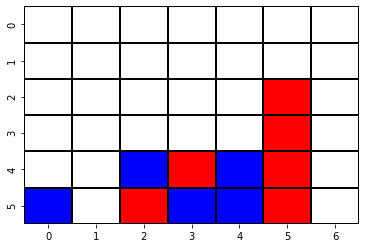

In [16]:
if __name__ == '__main__':
    main()